<a href="https://colab.research.google.com/github/claradwianggraini62-lab/Clara-Portofolio/blob/main/E_commerce_Customer_Behavior_(Sample).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Example: Read a CSV file
import pandas as pd

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/data/E-commerce Customer Behavior.csv'
df = pd.read_csv(file_path)

# Display the data
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Total Records: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print("\nColumn Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

DATASET OVERVIEW
Total Records: 350
Total Columns: 11

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB
None

Missing Values:
Customer ID       

# 1️⃣ DESCRIPTIVE INSIGHTS


1️⃣ DESCRIPTIVE INSIGHTS - Profil Pelanggan


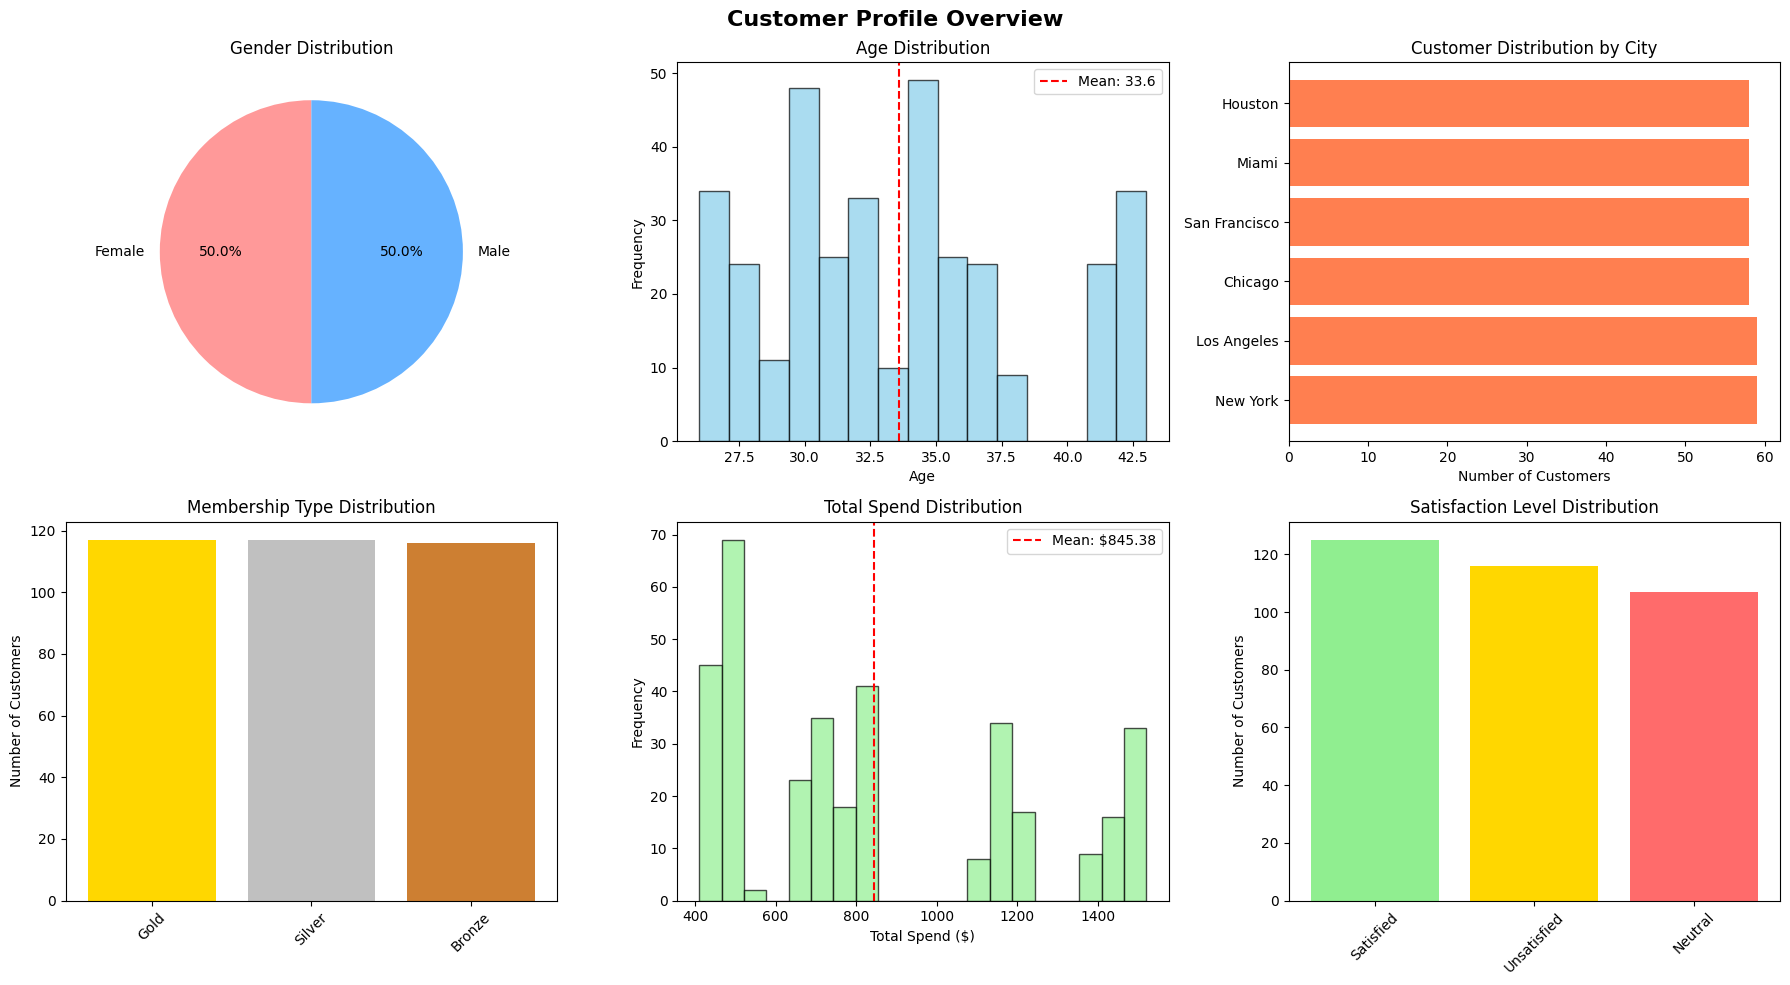


📊 KEY INSIGHTS - Demographics:
• Gender: Female 50.0% | Male 50.0%
• Age Range: 26-43 years (Avg: 33.6)
• Top City: New York (59 customers)

💳 Membership Contribution:
                 Total Revenue  Avg Spend  Count  Revenue %
Membership Type                                            
Bronze                 54913.1     473.39    116       18.6
Gold                  153403.9    1311.14    117       51.8
Silver                 87566.6     748.43    117       29.6


In [6]:
print("\n" + "=" * 80)
print("1️⃣ DESCRIPTIVE INSIGHTS - Profil Pelanggan")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Customer Profile Overview', fontsize=16, fontweight='bold')

# 1.1 Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
               colors=['#FF9999', '#66B2FF'], startangle=90)
axes[0, 0].set_title('Gender Distribution')

# 1.2 Age Distribution
axes[0, 1].hist(df['Age'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df['Age'].mean(), color='red', linestyle='--',
                    label=f'Mean: {df["Age"].mean():.1f}')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].legend()

# 1.3 City Distribution
city_counts = df['City'].value_counts()
axes[0, 2].barh(city_counts.index, city_counts.values, color='coral')
axes[0, 2].set_xlabel('Number of Customers')
axes[0, 2].set_title('Customer Distribution by City')

# 1.4 Membership Type
membership_counts = df['Membership Type'].value_counts()
axes[1, 0].bar(membership_counts.index, membership_counts.values,
               color=['#FFD700', '#C0C0C0', '#CD7F32'])
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].set_title('Membership Type Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# 1.5 Total Spend Distribution
axes[1, 1].hist(df['Total Spend'], bins=20, color='lightgreen',
                edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['Total Spend'].mean(), color='red', linestyle='--',
                    label=f'Mean: ${df["Total Spend"].mean():.2f}')
axes[1, 1].set_xlabel('Total Spend ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Total Spend Distribution')
axes[1, 1].legend()

# 1.6 Satisfaction Level
satisfaction_counts = df['Satisfaction Level'].value_counts()
axes[1, 2].bar(satisfaction_counts.index, satisfaction_counts.values,
               color=['#90EE90', '#FFD700', '#FF6B6B'])
axes[1, 2].set_ylabel('Number of Customers')
axes[1, 2].set_title('Satisfaction Level Distribution')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Key Insights - Demographics
print("\n📊 KEY INSIGHTS - Demographics:")
print(f"• Gender: Female {gender_counts.get('Female', 0)/len(df)*100:.1f}% | Male {gender_counts.get('Male', 0)/len(df)*100:.1f}%")
print(f"• Age Range: {df['Age'].min()}-{df['Age'].max()} years (Avg: {df['Age'].mean():.1f})")
print(f"• Top City: {city_counts.index[0]} ({city_counts.values[0]} customers)")

# Membership Analysis
print("\n💳 Membership Contribution:")
membership_revenue = df.groupby('Membership Type').agg({
    'Total Spend': ['sum', 'mean', 'count']
}).round(2)
membership_revenue.columns = ['Total Revenue', 'Avg Spend', 'Count']
membership_revenue['Revenue %'] = (membership_revenue['Total Revenue'] /
                                    membership_revenue['Total Revenue'].sum() * 100).round(1)
print(membership_revenue)

# **2️⃣ DIAGNOSTIC INSIGHTS **


2️⃣ DIAGNOSTIC INSIGHTS - Correlation Analysis


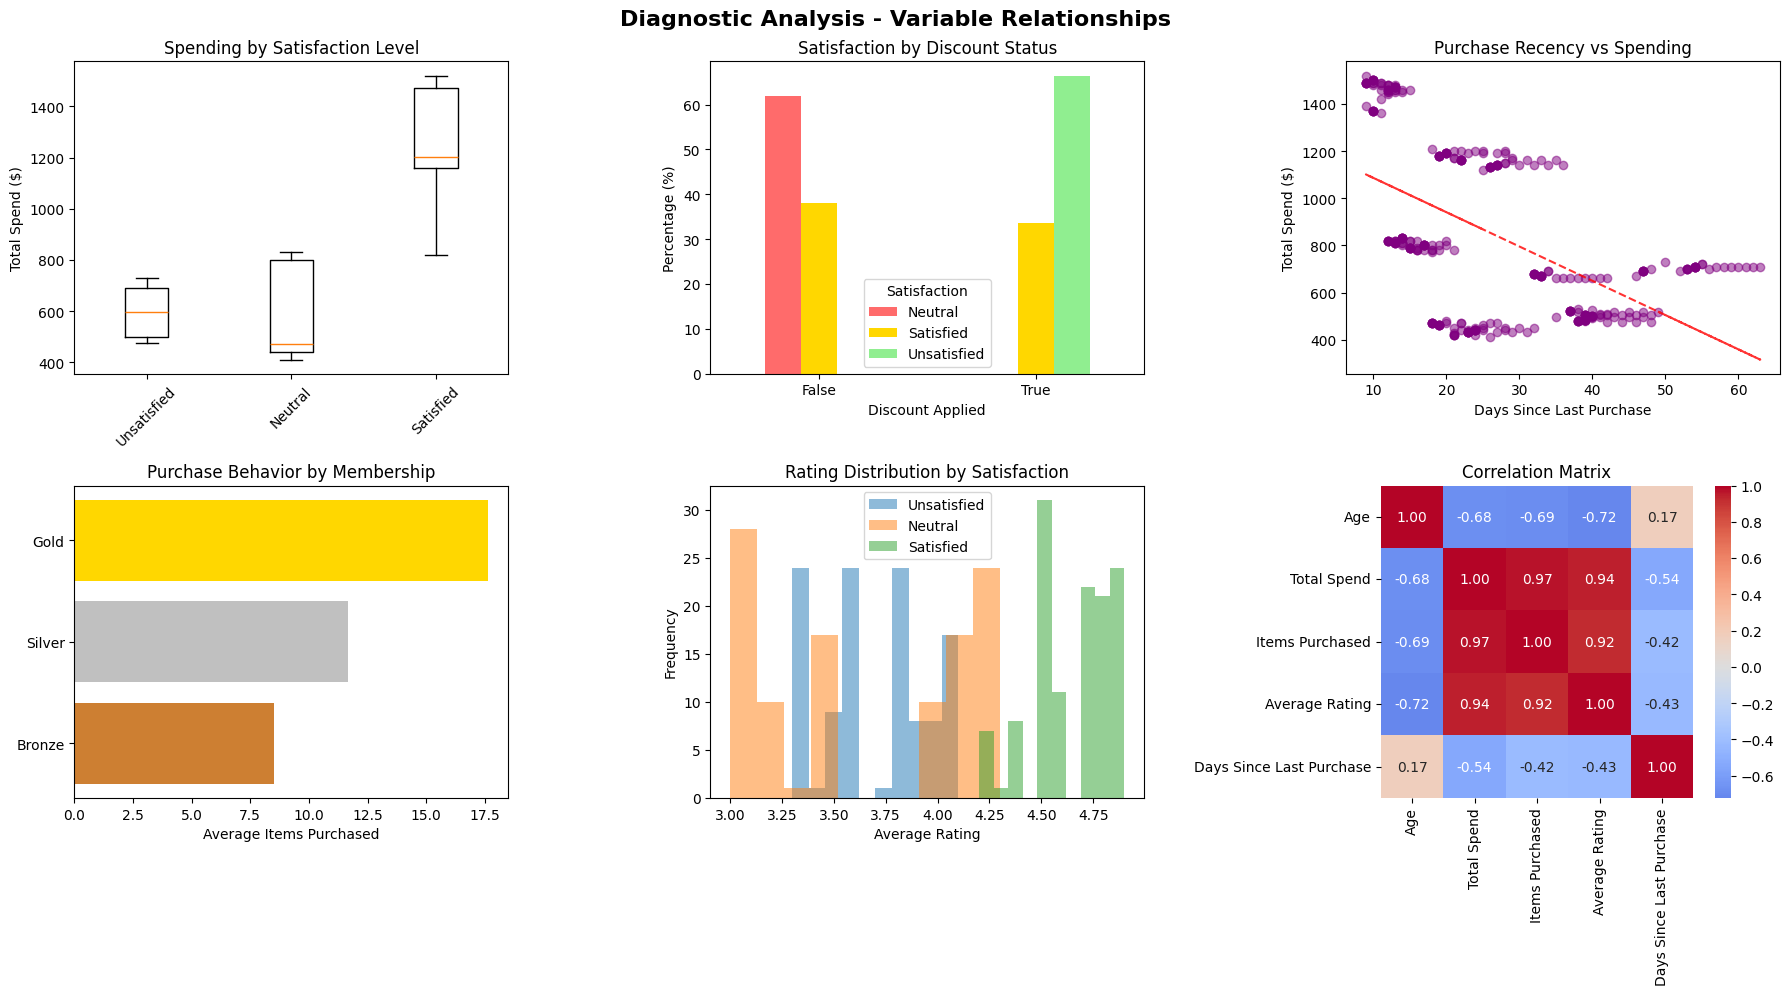


📈 CORRELATION INSIGHTS:
• Total Spend vs Items Purchased: r=0.972
• Average Rating vs Total Spend: r=0.941
• Days Since Last Purchase vs Total Spend: r=-0.540


In [7]:
print("\n" + "=" * 80)
print("2️⃣ DIAGNOSTIC INSIGHTS - Correlation Analysis")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Diagnostic Analysis - Variable Relationships', fontsize=16, fontweight='bold')

# 2.1 Total Spend vs Satisfaction Level
satisfaction_order = ['Unsatisfied', 'Neutral', 'Satisfied']
axes[0, 0].boxplot([df[df['Satisfaction Level']==level]['Total Spend'].dropna()
                     for level in satisfaction_order],
                    labels=satisfaction_order)
axes[0, 0].set_ylabel('Total Spend ($)')
axes[0, 0].set_title('Spending by Satisfaction Level')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2.2 Discount Impact on Satisfaction
discount_sat = pd.crosstab(df['Discount Applied'], df['Satisfaction Level'],
                           normalize='index') * 100
discount_sat.plot(kind='bar', ax=axes[0, 1], color=['#FF6B6B', '#FFD700', '#90EE90'])
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].set_title('Satisfaction by Discount Status')
axes[0, 1].set_xlabel('Discount Applied')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].legend(title='Satisfaction')

# 2.3 Days Since Last Purchase vs Total Spend
axes[0, 2].scatter(df['Days Since Last Purchase'], df['Total Spend'],
                   alpha=0.5, color='purple')
z = np.polyfit(df['Days Since Last Purchase'], df['Total Spend'], 1)
p = np.poly1d(z)
axes[0, 2].plot(df['Days Since Last Purchase'],
                p(df['Days Since Last Purchase']), "r--", alpha=0.8)
axes[0, 2].set_xlabel('Days Since Last Purchase')
axes[0, 2].set_ylabel('Total Spend ($)')
axes[0, 2].set_title('Purchase Recency vs Spending')

# 2.4 Membership vs Items Purchased
membership_items = df.groupby('Membership Type')['Items Purchased'].mean().sort_values()
axes[1, 0].barh(membership_items.index, membership_items.values,
                color=['#CD7F32', '#C0C0C0', '#FFD700'])
axes[1, 0].set_xlabel('Average Items Purchased')
axes[1, 0].set_title('Purchase Behavior by Membership')

# 2.5 Average Rating vs Satisfaction
for sat in satisfaction_order:
    data = df[df['Satisfaction Level']==sat]['Average Rating']
    axes[1, 1].hist(data, alpha=0.5, label=sat, bins=10)
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Rating Distribution by Satisfaction')
axes[1, 1].legend()

# 2.6 Correlation Heatmap
numeric_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
                'Days Since Last Purchase']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[1, 2], fmt='.2f')
axes[1, 2].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Statistical Tests
print("\n📈 CORRELATION INSIGHTS:")
print(f"• Total Spend vs Items Purchased: r={df['Total Spend'].corr(df['Items Purchased']):.3f}")
print(f"• Average Rating vs Total Spend: r={df['Average Rating'].corr(df['Total Spend']):.3f}")
print(f"• Days Since Last Purchase vs Total Spend: r={df['Days Since Last Purchase'].corr(df['Total Spend']):.3f}")

# *3️⃣ PREDICTIVE INSIGHTS *

In [10]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


3️⃣ PREDICTIVE INSIGHTS - Strategic Analysis

🚨 CHURN RISK ANALYSIS:
High Risk Customers: 41 (11.7%)

Churn Risk Profile:
           Total Spend  Items Purchased  Average Rating  \
Low Risk        868.83            12.65            4.03   
High Risk       668.64            12.22            3.92   

           Days Since Last Purchase  
Low Risk                      23.19  
High Risk                     52.17  

🎯 CUSTOMER SEGMENTATION:

Customer Segments:
         Avg Spend  Avg Items  Avg Rating  Avg Days Since Purchase  Avg Age  \
Segment                                                                       
0           690.39      11.64        3.93                    45.50    28.95   
1          1455.55      19.95        4.81                    11.29    29.15   
2           473.39       8.49        3.32                    31.61    39.36   
3           983.34      13.44        4.35                    19.95    32.43   

         Count        Segment Name  
Segment                    

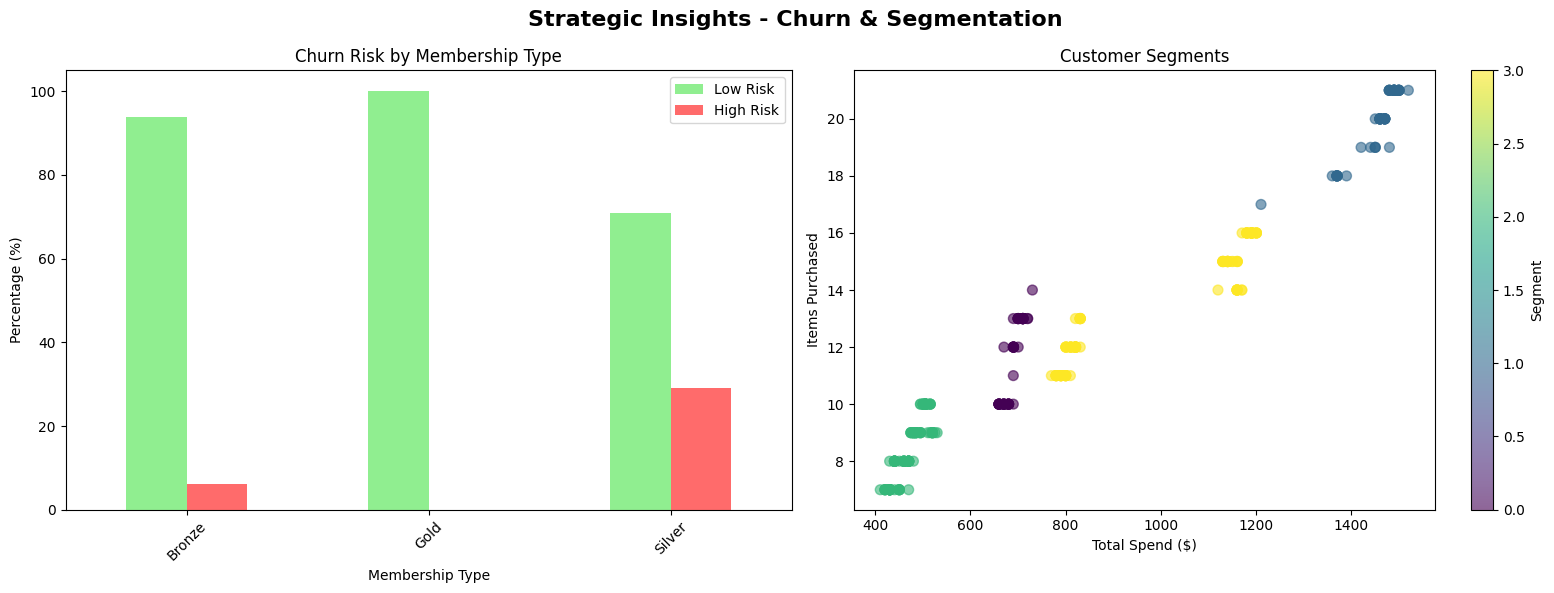

In [11]:
print("\n" + "=" * 80)
print("3️⃣ PREDICTIVE INSIGHTS - Strategic Analysis")
print("=" * 80)

# 3.1 Churn Risk Analysis
# Define churn: Days Since Last Purchase > 45 & Satisfaction != 'Satisfied'
df['Churn_Risk'] = ((df['Days Since Last Purchase'] > 45) &
                    (df['Satisfaction Level'] != 'Satisfied')).astype(int)

print(f"\n🚨 CHURN RISK ANALYSIS:")
print(f"High Risk Customers: {df['Churn_Risk'].sum()} ({df['Churn_Risk'].sum()/len(df)*100:.1f}%)")

# Churn characteristics
churn_profile = df.groupby('Churn_Risk').agg({
    'Total Spend': 'mean',
    'Items Purchased': 'mean',
    'Average Rating': 'mean',
    'Days Since Last Purchase': 'mean'
}).round(2)
churn_profile.index = ['Low Risk', 'High Risk']
print("\nChurn Risk Profile:")
print(churn_profile)

# 3.2 Customer Segmentation (K-Means Clustering)
print("\n🎯 CUSTOMER SEGMENTATION:")

# Prepare features for clustering
features_for_clustering = ['Total Spend', 'Items Purchased', 'Average Rating',
                           'Days Since Last Purchase', 'Age']
X_cluster = df[features_for_clustering].copy()

# Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Segment profiles
segment_profile = df.groupby('Segment').agg({
    'Total Spend': 'mean',
    'Items Purchased': 'mean',
    'Average Rating': 'mean',
    'Days Since Last Purchase': 'mean',
    'Age': 'mean',
    'Customer ID': 'count'
}).round(2)
segment_profile.columns = ['Avg Spend', 'Avg Items', 'Avg Rating',
                          'Avg Days Since Purchase', 'Avg Age', 'Count']

# Name segments based on characteristics
segment_names = []
for i in range(4):
    seg_data = segment_profile.loc[i]
    if seg_data['Avg Spend'] > 1000 and seg_data['Avg Rating'] > 4.0:
        segment_names.append('VIP Loyalists')
    elif seg_data['Avg Spend'] < 700 and seg_data['Avg Days Since Purchase'] > 40:
        segment_names.append('At Risk')
    elif seg_data['Avg Rating'] > 4.0:
        segment_names.append('Satisfied Regulars')
    else:
        segment_names.append('Potential Growers')

segment_profile['Segment Name'] = segment_names
print("\nCustomer Segments:")
print(segment_profile)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Strategic Insights - Churn & Segmentation', fontsize=16, fontweight='bold')

# Churn Risk by Membership
churn_by_membership = pd.crosstab(df['Membership Type'],
                                  df['Churn_Risk'], normalize='index') * 100
churn_by_membership.plot(kind='bar', ax=axes[0], color=['#90EE90', '#FF6B6B'])
axes[0].set_ylabel('Percentage (%)')
axes[0].set_title('Churn Risk by Membership Type')
axes[0].set_xlabel('Membership Type')
axes[0].legend(['Low Risk', 'High Risk'])
axes[0].tick_params(axis='x', rotation=45)

# Segment scatter plot
scatter = axes[1].scatter(df['Total Spend'], df['Items Purchased'],
                         c=df['Segment'], cmap='viridis', alpha=0.6, s=50)
axes[1].set_xlabel('Total Spend ($)')
axes[1].set_ylabel('Items Purchased')
axes[1].set_title('Customer Segments')
plt.colorbar(scatter, ax=axes[1], label='Segment')

plt.tight_layout()
plt.show()

# 📋 STRATEGIC RECOMMENDATIONS

In [12]:
print("\n" + "=" * 80)
print("📋 STRATEGIC RECOMMENDATIONS")
print("=" * 80)

print("\n1️⃣ FOCUS ON HIGH-VALUE SEGMENTS:")
vip_segment = segment_profile[segment_profile['Segment Name'] == 'VIP Loyalists']
if not vip_segment.empty:
    print(f"   • VIP Loyalists: {vip_segment['Count'].values[0]} customers")
    print(f"     → Average Spend: ${vip_segment['Avg Spend'].values[0]:.2f}")
    print("     → Action: Exclusive rewards, early access to products")

print("\n2️⃣ REDUCE CHURN RISK:")
at_risk_count = df['Churn_Risk'].sum()
print(f"   • {at_risk_count} customers at high risk")
print("     → Action: Re-engagement campaigns, personalized offers")

print("\n3️⃣ OPTIMIZE DISCOUNT STRATEGY:")
discount_impact = df.groupby('Discount Applied')['Satisfaction Level'].value_counts(normalize=True)
print("     → Discounts are effective for acquisition, not retention")
print("     → Action: Focus discounts on new customers, invest in service for existing")

print("\n4️⃣ MEMBERSHIP UPGRADE OPPORTUNITIES:")
bronze_silver = df[df['Membership Type'].isin(['Bronze', 'Silver'])]
potential_upgrades = bronze_silver[
    (bronze_silver['Total Spend'] > bronze_silver['Total Spend'].median()) &
    (bronze_silver['Average Rating'] > 4.0)
]
print(f"   • {len(potential_upgrades)} customers ready for membership upgrade")
print("     → Action: Targeted upgrade campaigns with benefits showcase")

print("\n" + "=" * 80)
print("Analysis Complete! 🎉")
print("=" * 80)



📋 STRATEGIC RECOMMENDATIONS

1️⃣ FOCUS ON HIGH-VALUE SEGMENTS:
   • VIP Loyalists: 59 customers
     → Average Spend: $1455.55
     → Action: Exclusive rewards, early access to products

2️⃣ REDUCE CHURN RISK:
   • 41 customers at high risk
     → Action: Re-engagement campaigns, personalized offers

3️⃣ OPTIMIZE DISCOUNT STRATEGY:
     → Discounts are effective for acquisition, not retention
     → Action: Focus discounts on new customers, invest in service for existing

4️⃣ MEMBERSHIP UPGRADE OPPORTUNITIES:
   • 66 customers ready for membership upgrade
     → Action: Targeted upgrade campaigns with benefits showcase

Analysis Complete! 🎉
